# Import and Reading the Data

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('rossman_train.csv', parse_dates = ['Date'], infer_datetime_format = True, dayfirst = True, low_memory=False)
store = pd.read_csv('rossman_store.csv')

In [5]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [7]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
# checking if there is any Null data inside the given data

print("No. of Null values in the train set :", train.isnull().sum().sum())
print("No. of Null values in the store set :", store.isnull().sum().sum())

No. of Null values in the train set : 0
No. of Null values in the store set : 2343


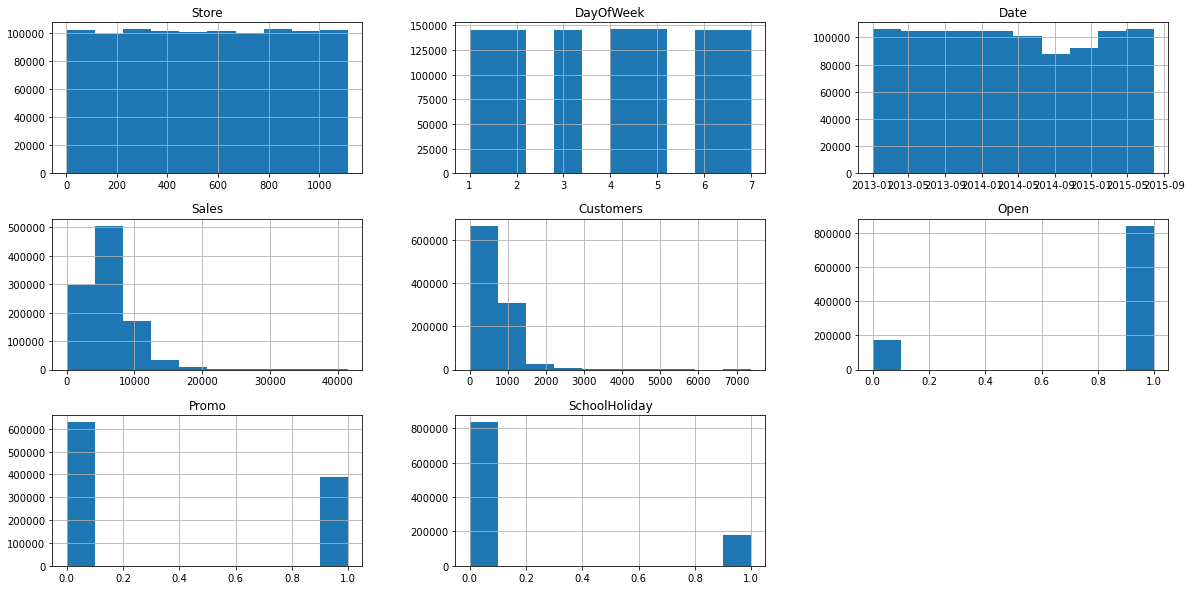

In [10]:
train.hist(figsize=(20,10))
plt.show()

In [11]:
train["Store"].unique().sum()

622170

In [12]:
df_new = train.merge(store,on=["Store"], how="inner")
print(df_new.shape)

(1017209, 18)


In [13]:
df_new['Date'] = pd.to_datetime(df_new['Date'], infer_datetime_format=True)
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week

C:\Users\DanThanh215\AppData\Local\Temp\ipykernel_724\3125819137.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_new["Week"] = df_new["Date"].dt.week


In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [15]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,7,3,2015,31,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,7,3,2015,30,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,7,3,2015,29,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,7,3,2015,28,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,7,3,2015,27,31


In [16]:
df_new.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Quarter,Year,Day,Week
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,5.846762e+00,2.294252e+00,2.013832e+03,1.570279e+01,2.361551e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,3.326097e+00,1.081850e+00,7.773960e-01,8.787638e+00,1.443338e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,1.000000e+00,1.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,3.000000e+00,1.000000e+00,2.013000e+03,8.000000e+00,1.100000e+01
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,6.000000e+00,2.000000e+00,2.014000e+03,1.600000e+01,2.200000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,8.000000e+00,3.000000e+00,2.014000e+03,2.300000e+01,3.500000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,1.200000e+01,4.000000e+00,2.015000e+03,3.100000e+01,5.200000e+01


In [17]:
df_new[["DayOfWeek", 'Sales', 'Customers', 'CompetitionDistance']].skew()

DayOfWeek              0.001593
Sales                  0.641460
Customers              1.598650
CompetitionDistance    2.928534
dtype: float64

In [18]:
df_new[["DayOfWeek", 'Sales', 'Customers', 'CompetitionDistance']].kurtosis()

DayOfWeek              -1.246873
Sales                   1.778375
Customers               7.091773
CompetitionDistance    13.000022
dtype: float64

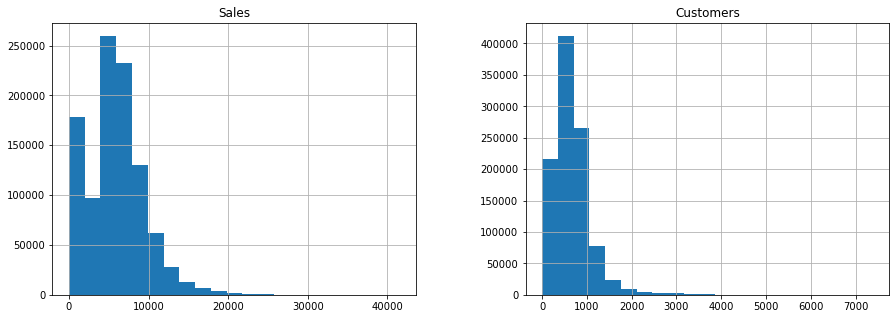

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df_new.hist(column='Sales', bins='sturges', ax=axes[0])
df_new.hist(column='Customers', bins='sturges', ax=axes[1])

fig.set_size_inches(15, 5)
plt.show()  


In [20]:
#Histograms of our Sales and Customers values show us a positive skew and high kurtosis.

In [21]:
#Next we'll take a closer look at our statistics for our Sales column.

In [22]:
print("skew     " + str(round(df_new['Sales'].skew(),6)))
print("kurtosis " + str(round(df_new['Sales'].kurtosis(),6)))
print(df_new['Sales'].describe().round(3))
print("mode     " + str(df_new['Sales'].mode()))

skew     0.64146
kurtosis 1.778375
count    1017209.000
mean        5773.819
std         3849.926
min            0.000
25%         3727.000
50%         5744.000
75%         7856.000
max        41551.000
Name: Sales, dtype: float64
mode     0    0
Name: Sales, dtype: int64


In [23]:
#We can see our sales figures have a slightly positive skew, with the mean (5773.819) only slightly larger than the median (5744.000), suggesting most outliers are to the right of the mean.

#High kurtosis indicates it's leptokurtic with the likelihood of heavy tails and outliers that may be extreme. Considering our min and max values of 0 and 41,551 sales, we aren't surprised to see there may be some extreme outliers.

#The max value well above the mean of 5,773.819 and outside the standard deviation of 3849.926 helps us see how our mean ends up getting pulled slightly to the right for our positive skew.

#There is no mode as we don't have any stores recording the exact same number of sales on any days, which isn't surprising.

# Data cleaning

In [24]:
#We'll do a quick check for and delete any rows that are complete duplicates of another row, as we should only have one entry for each store and date.

In [25]:
print("Rows before dropping duplicates: " + str(df_new.shape[0]))
df_new = df_new.drop_duplicates()
print("Rows after dropping duplicates: " + str(df_new.shape[0]))

Rows before dropping duplicates: 1017209
Rows after dropping duplicates: 1017209


In [26]:
#Next we'll check our four columns that contain strings to make sure we have no inappropriately entered data. Using str.strip() to remove any accidental leading or trailing spaces.

In [27]:
for col in df_new:
    if df_new[col].dtype == object:
        df_new[col] = df_new[col].str.strip()

In [28]:
for col in df_new:
    if df_new[col].dtype == object:
        print(df_new[col].value_counts())

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64
a    537445
c    471470
b      8294
Name: Assortment, dtype: int64
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64


In [29]:
#Everything is looking as expected in our columns that contain text, and because each column only has 3-4 unique values we can see we don't need to worry about changing anything to lower, upper, or proper case.

In [30]:
#We'll also do a quick check of columns we expect to only have a few unique values or binary flags, such as DayOfWeek or Promo, to make sure there's nothing unexpected there.

In [31]:
check_cols = [ 'Open', 'Promo', 'Promo2', 'SchoolHoliday',  'DayOfWeek', 'CompetitionOpenSinceMonth',  'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']

for col in check_cols:
    print(col)
    print(sorted(df_new[col].unique()))

Open
[0, 1]
Promo
[0, 1]
Promo2
[0, 1]
SchoolHoliday
[0, 1]
DayOfWeek
[1, 2, 3, 4, 5, 6, 7]
CompetitionOpenSinceMonth
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan]
CompetitionOpenSinceYear
[1900.0, 1961.0, 1990.0, 1994.0, 1995.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, nan]
Promo2SinceWeek
[nan, 1.0, 5.0, 6.0, 9.0, 10.0, 13.0, 14.0, 18.0, 22.0, 23.0, 26.0, 27.0, 28.0, 31.0, 35.0, 36.0, 37.0, 39.0, 40.0, 44.0, 45.0, 48.0, 49.0, 50.0]
Promo2SinceYear
[nan, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0]


In [32]:
#We see the relevant binary flags, day of weeks, week, month, and year numeric values we expect.

#Because the CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, and Promo2SinceYear columns are only using whole numbers and they are a discrete value, we will change them from floats to integers.

In [33]:
df_new['CompetitionOpenSinceMonth'] = df_new['CompetitionOpenSinceMonth'].convert_dtypes()
df_new['CompetitionOpenSinceYear'] = df_new['CompetitionOpenSinceYear'].convert_dtypes()
df_new['Promo2SinceWeek'] = df_new['Promo2SinceWeek'].convert_dtypes()
df_new['Promo2SinceYear'] = df_new['Promo2SinceYear'].convert_dtypes()

In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [35]:
#Now we can see that CompetitionDistance, our only continuous value, is our only column with floats.

In [36]:
#For the purposes of our analysis I've chosen to drop these rows, as no sales are recorded on days stores are closed. The zero sales recorded for each of these rows lowers the average sales, and we can see this by comparing the mean Sales for all entries in our table to the mean Sales of only days that stores were open. If we filter for entries of stores that are closed we'll see a return of 172,817 rows, all of which record the expected 0 sales, lowering our mean Sales statistic.

In [37]:
# mean sales including entries for days stores are closed
df_new['Sales'].mean()

5773.818972305593

In [38]:
## mean sales for only days stores are open
df_new.loc[df_new['Open'] == 1, 'Sales'].mean()

6955.514290755952

In [39]:
## confirming all entries where the store is  marked as closed have 0 sales
df_new.loc[df_new["Open"] == 0, ['Sales', 'Customers']].value_counts()

Sales  Customers
0      0            172817
dtype: int64

In [40]:
# creating new sales dataframe with only entries for days stores are open
df_new = df_new.drop(index=(df_new[df_new["Open"] == 0]).index, axis=1)

In [41]:
df_new['Open'].value_counts()

1    844392
Name: Open, dtype: int64

In [42]:
df_new.drop(columns=["Open"], inplace=True)

# Outlier

Sales                     AxesSubplot(0.125,0.536818;0.352273x0.343182)
Customers              AxesSubplot(0.547727,0.536818;0.352273x0.343182)
CompetitionDistance          AxesSubplot(0.125,0.125;0.352273x0.343182)
dtype: object

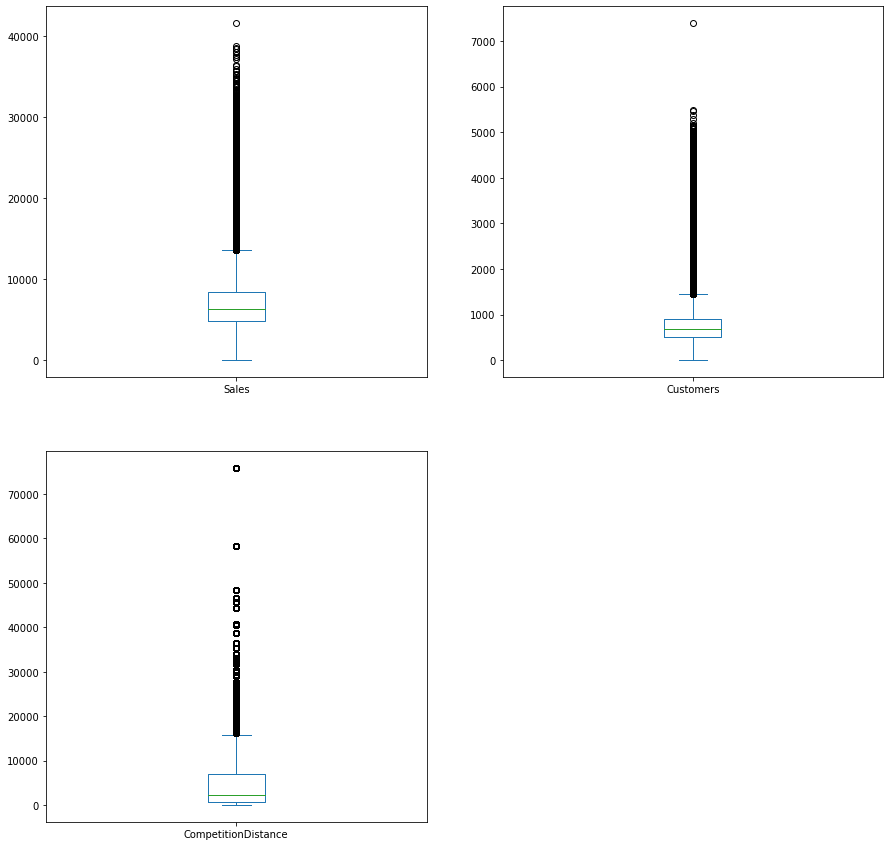

In [43]:
df_new.plot(y=['Sales', 'Customers', 'CompetitionDistance'], 
           kind='box', subplots=True, layout=(2,2), figsize=(15,15))

In [44]:
#From the box plots above we can see that Sales, Customers, and CompetitionDistance all appear to have significant outliers, so we'll explore further by calculating and investigating the outliers for each one.



In [45]:
#We will start with the Sales column.

In [46]:
def calculate_outlier(df,column): ## function for calculating outliers
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    percent_outliers = round(((df[df[column] > upper].shape[0]) + (df[df[column] < lower].shape[0])) / df.shape[0] * 100, 2)
    return lower, upper, percent_outliers

In [47]:
col = 'Sales'
lower_sales, upper_sales, percent_outliers_sales = calculate_outlier(df_new, col)

print("lower band = " + str(lower_sales))
print("upper band = " + str(upper_sales))
print("percentage of sales that are outliers = " + str(percent_outliers_sales) + "%")

lower band = -392.5
upper band = 13611.5
percentage of sales that are outliers = 3.64%


In [48]:
#We know from our summary statistics that there aren't any sales below 0, so we'll just look at the upper outliers that we've calculated for the Sales column.

In [49]:
df_new[df_new[col] > upper_sales]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week
2280,3,1,2014-06-30,15689,1193,1,0,0,a,a,...,2006,1,14,2011,"Jan,Apr,Jul,Oct",6,2,2014,30,27
2469,3,1,2013-12-23,14461,1579,0,0,1,a,a,...,2006,1,14,2011,"Jan,Apr,Jul,Oct",12,4,2013,23,52
2475,3,2,2013-12-17,14555,1284,1,0,0,a,a,...,2006,1,14,2011,"Jan,Apr,Jul,Oct",12,4,2013,17,51
2476,3,1,2013-12-16,14647,1282,1,0,0,a,a,...,2006,1,14,2011,"Jan,Apr,Jul,Oct",12,4,2013,16,51
2826,4,5,2015-07-31,13995,1498,1,0,1,c,c,...,2009,0,<NA>,<NA>,NaN,7,3,2015,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016260,1114,1,2013-01-07,21237,2962,1,0,0,a,c,...,<NA>,0,<NA>,<NA>,NaN,1,1,2013,7,2
1016262,1114,6,2013-01-05,18856,3065,0,0,0,a,c,...,<NA>,0,<NA>,<NA>,NaN,1,1,2013,5,1
1016263,1114,5,2013-01-04,18371,3036,0,0,1,a,c,...,<NA>,0,<NA>,<NA>,NaN,1,1,2013,4,1
1016264,1114,4,2013-01-03,18463,3211,0,0,1,a,c,...,<NA>,0,<NA>,<NA>,NaN,1,1,2013,3,1


In [50]:
#While 30,769 is a lot of values, we can see from our calculte_outlier function that these outliers only account for 3.64% of all our sales values.

#We'll look further to see if we see any trends with the outliers based on Month or Type of Store.

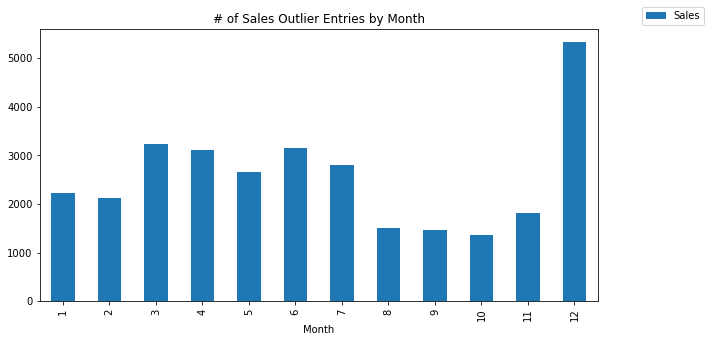

In [51]:
sales_outliers_by_month = pd.pivot_table((df_new.loc[df_new[col] > upper_sales]), index='Month', values='Sales', aggfunc='count')

sales_outliers_by_month.plot(y='Sales', kind='bar', figsize=(10,5), title="# of Sales Outlier Entries by Month")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

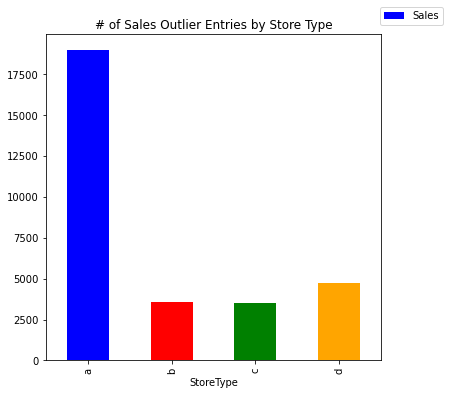

In [52]:
sales_outliers_by_stype = pd.pivot_table((df_new.loc[df_new[col] > upper_sales]), index='StoreType', values='Sales', aggfunc='count')

sales_outliers_by_stype.plot(y='Sales', kind='bar', figsize=(6,6), 
                             title="# of Sales Outlier Entries by Store Type", 
                             color=['blue','red','green','orange'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


In [53]:
#When we look at the Sales outliers by month, we see the most represented month is December at 17.33%, which is unsurprising given the Christmas holidays. However, when we look at the outliers by Store Type we see that the 61.71% majority are coming from Type A stores, while Type B, C, D are more equally represented at 11-15%. This suggests that Type A stores may be the best performers in regards to outstanding sales days, and is worth looking into further.

#Below we will treat our Sales outliers by imputing them with our upper range value we calculated earlier, 13611.5, rounded up to 13612 as our Sales column is a measure of discrete values using whole numbers. As these outliers represent exceptionally high sales day, they are intended to be high numbers, but we would like to treat the outliers to limit their influence on any future modelling. As such imputing with our upper range value feels more appropriate than using our mean Sales value.

In [54]:
df_new.loc[df_new[col] > upper_sales, 'Sales'] = 13612

In [55]:
df_new[df_new['Sales'] > 13612] ## double-checking our imputation worked

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week


In [92]:
#Next we'll calculate and investigate our Customer outliers.

In [94]:
col = 'Customers'
lower_cust, upper_cust, percent_outliers_cust = calculate_outlier(df_new, col)

print(str(lower_cust) + ", " + str(upper_cust) +", " + str(percent_outliers_cust) + "%")

-42.0, 1454.0, 4.84%


In [95]:
#Similar to Sales, we know from our summary statistics that we don't have any Customer values below 0, so we'll just look at our upper range value.

In [96]:
df_new[df_new['Customers'] > upper_cust]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week
2469,3,1,2013-12-23,13612,1579,0,0,1,a,a,...,2006,1,14,2011,"Jan,Apr,Jul,Oct",12,4,2013,23,52
2826,4,5,2015-07-31,13612,1498,1,0,1,c,c,...,2009,0,1,2023,NA,7,3,2015,31,31
2843,4,2,2015-07-14,12315,1485,1,0,0,c,c,...,2009,0,1,2023,NA,7,3,2015,14,29
2844,4,1,2015-07-13,13550,1619,1,0,0,c,c,...,2009,0,1,2023,NA,7,3,2015,13,29
2857,4,2,2015-06-30,13106,1488,1,0,0,c,c,...,2009,0,1,2023,NA,6,2,2015,30,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016260,1114,1,2013-01-07,13612,2962,1,0,0,a,c,...,2023,0,1,2023,NA,1,1,2013,7,2
1016262,1114,6,2013-01-05,13612,3065,0,0,0,a,c,...,2023,0,1,2023,NA,1,1,2013,5,1
1016263,1114,5,2013-01-04,13612,3036,0,0,1,a,c,...,2023,0,1,2023,NA,1,1,2013,4,1
1016264,1114,4,2013-01-03,13612,3211,0,0,1,a,c,...,2023,0,1,2023,NA,1,1,2013,3,1


In [ ]:
#We Can see right away that several of these entries have a Sales value of 13,612, which we know to be our newly imputed upper range value for Sales outliers. We expect a high correlation between Customers driving Sales, so we'll check to see how much crossover we have between our Sales and Customers outliers.

In [97]:
df_new[(df_new['Customers'] > upper_cust) & (df_new['Sales'] == 13612)]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week
2469,3,1,2013-12-23,13612,1579,0,0,1,a,a,...,2006,1,14,2011,"Jan,Apr,Jul,Oct",12,4,2013,23,52
2826,4,5,2015-07-31,13612,1498,1,0,1,c,c,...,2009,0,1,2023,NA,7,3,2015,31,31
2886,4,1,2015-06-01,13612,1695,1,0,0,c,c,...,2009,0,1,2023,NA,6,2,2015,1,23
2918,4,4,2015-04-30,13612,1854,1,0,0,c,c,...,2009,0,1,2023,NA,4,2,2015,30,18
2944,4,6,2015-04-04,13612,1917,0,0,0,c,c,...,2009,0,1,2023,NA,4,2,2015,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016260,1114,1,2013-01-07,13612,2962,1,0,0,a,c,...,2023,0,1,2023,NA,1,1,2013,7,2
1016262,1114,6,2013-01-05,13612,3065,0,0,0,a,c,...,2023,0,1,2023,NA,1,1,2013,5,1
1016263,1114,5,2013-01-04,13612,3036,0,0,1,a,c,...,2023,0,1,2023,NA,1,1,2013,4,1
1016264,1114,4,2013-01-03,13612,3211,0,0,1,a,c,...,2023,0,1,2023,NA,1,1,2013,3,1


In [ ]:
#We can see a crossover of 21,420 rows, or approximately 52% of our Customer outlier entries are also Sales outlier entries.

#We will also investigate how these Customer outliers break down by Month and StoreType just as we did with our Sales outliers.

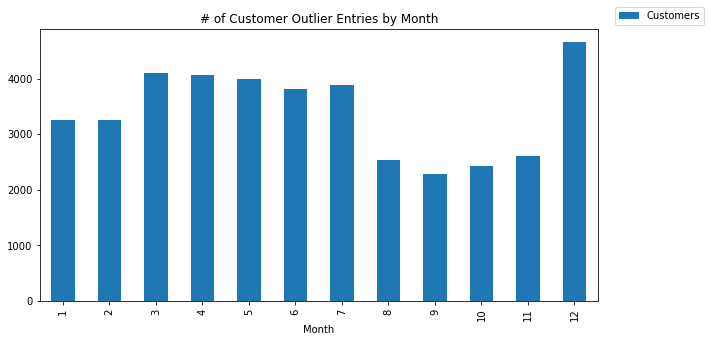

In [99]:
cust_outliers_by_month = pd.pivot_table((df_new.loc[df_new[col] > upper_cust]), index='Month', values='Customers', aggfunc='count')

cust_outliers_by_month.plot(y='Customers', kind='bar', figsize=(10,5), title="# of Customer Outlier Entries by Month")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

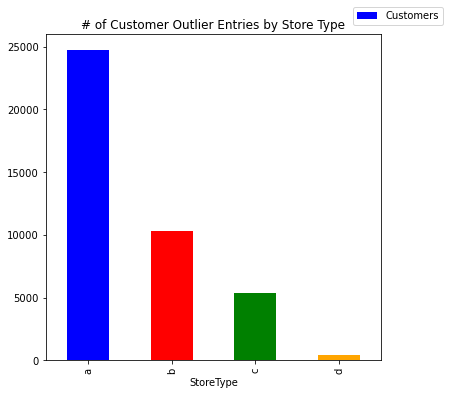

In [100]:
cust_outliers_by_stype = pd.pivot_table((df_new.loc[df_new[col] > upper_cust]), index='StoreType', values='Customers', aggfunc='count')

cust_outliers_by_stype.plot(y='Customers', kind='bar', figsize=(6,6), 
                             title="# of Customer Outlier Entries by Store Type", 
                             color=['blue','red','green','orange'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

In [101]:
#December is our most represented month for Customer outliers, similar to our Sales outliers, but it's percentage of outliers is less than we saw with our Sales.

#We also see store Type A with the strongest showing when we break down the outliers by store type. Much like the Sales outliers Type A stores represent a strong 60%+ of the outliers. Surprisingly, Type D stores represent a tiny 1.02% of these Customer outliers, where as they represented the second largest percentage of Sales outliers at 15.29%. Further investigation into the number of items bought (Sales) per transaction (Customer) may prove insightful.

#Similar to our Sales outliers, we will also limit our Customer outliers to our calculated upper range, by imputing them to 1,454, so as to limit their influence but also indicate that they're meant to be high numbers.

In [102]:
df_new.loc[df_new['Customers'] > upper_cust, 'Customers'] = 1454

In [103]:
df_new.loc[df_new['Customers'] > upper_cust, 'Customers']

Series([], Name: Customers, dtype: int64)

# Missing Values

In [56]:
df_new.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
Month                             0
Quarter                           0
Year                              0
Day                               0
Week                              0
dtype: int64

In [57]:
(df_new.isna().sum() * 100 / df_new.shape[0]).round(2)   ## missing values as a % of all values in the column

Store                         0.00
DayOfWeek                     0.00
Date                          0.00
Sales                         0.00
Customers                     0.00
Promo                         0.00
StateHoliday                  0.00
SchoolHoliday                 0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.26
CompetitionOpenSinceMonth    31.81
CompetitionOpenSinceYear     31.81
Promo2                        0.00
Promo2SinceWeek              50.13
Promo2SinceYear              50.13
PromoInterval                50.13
Month                         0.00
Quarter                       0.00
Year                          0.00
Day                           0.00
Week                          0.00
dtype: float64

In [58]:
#While we see a rather high 50% missing values rate for Promo2SinceWeek and Promo2SinceYear we can check and see if these all just correspond to stores that aren't running Promo2, and hence would not be expected to have valid data for these columns.

In [59]:
print(df_new[df_new['Promo2'] == 0].shape[0])
print(df_new['Promo2SinceWeek'].isna().sum())
print(df_new['Promo2SinceYear'].isna().sum())

423307
423307
423307


In [60]:
#The other area we see missing data is in relation to competition stores, mostly in the two columns relating when the nearest competitor store opened, and to much lesser extent in CompetitionDistance

#The CompetitionDistance values may be used for analyzing how stores perform based on how close their competition is, and as such missing values could skew such analysis. 0 would be an inappropriate replacement for these null values as it would indicate that the competition stores are incredibly close. As such we'll look to replace these missing values with the mean CompetitionDistance based on the StoreType.

In [61]:
mean_type_a = round(df_new.loc[(df_new['StoreType'] == 'a'), 'CompetitionDistance'].mean(), 1)
mean_type_b = round(df_new.loc[(df_new['StoreType'] == 'b'), 'CompetitionDistance'].mean(), 1)
mean_type_c = round(df_new.loc[(df_new['StoreType'] == 'c'), 'CompetitionDistance'].mean(), 1)
mean_type_d = round(df_new.loc[(df_new['StoreType'] == 'd'), 'CompetitionDistance'].mean(), 1)

print("The mean Compeition Distance for stores of type A is " + str(mean_type_a))
print("The mean Compeition Distance for stores of type B is " + str(mean_type_b))
print("The mean Compeition Distance for stores of type C is " + str(mean_type_c))
print("The mean Compeition Distance for stores of type D is " + str(mean_type_d))

The mean Compeition Distance for stores of type A is 5227.7
The mean Compeition Distance for stores of type B is 1072.5
The mean Compeition Distance for stores of type C is 3514.1
The mean Compeition Distance for stores of type D is 6984.8


In [62]:
df_new.loc[df_new['StoreType'] == 'a'] = df_new.loc[df_new['StoreType'] == 'a'].fillna(value={"CompetitionDistance" : mean_type_a})
df_new.loc[df_new['StoreType'] == 'b'] = df_new.loc[df_new['StoreType'] == 'b'].fillna(value={"CompetitionDistance" : mean_type_b}) 
df_new.loc[df_new['StoreType'] == 'c'] = df_new.loc[df_new['StoreType'] == 'c'].fillna(value={"CompetitionDistance" : mean_type_c}) 
df_new.loc[df_new['StoreType'] == 'd'] = df_new.loc[df_new['StoreType'] == 'd'].fillna(value={"CompetitionDistance" : mean_type_d}) 

In [63]:
df_new.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
Month                             0
Quarter                           0
Year                              0
Day                               0
Week                              0
dtype: int64

In [64]:
#Next we will replace the null values in our PromoInterval column. As this column contains strings listing the months the Promo2 starts anew, we will replace the missing values with a string 'NA' for Not Applicable.

In [65]:
df_new.loc[df_new['PromoInterval'].isna(), 'PromoInterval'] = "NA"

In [66]:
df_new['PromoInterval'].value_counts()

NA                  423307
Jan,Apr,Jul,Oct     242411
Feb,May,Aug,Nov      98005
Mar,Jun,Sept,Dec     80669
Name: PromoInterval, dtype: int64

In [67]:
#For the missing values in 'CompetitionOpenSinceYear' & 'Promo2SinceYear' it would be inappropriate to replace them with zeros, as further calculations with the years in that column could lead to values suggesting a competition store has been open 2022 years. As such, we'll impute these missing values with the current year, so if calculations are done to find how long the nearest competition store has been open since these instances of no competition store nearby will return zero years.

#In the same manner we will impute the missing values in 'CompetitionOpenSinceMonth' with the current month, and 'Promo2SinceWeek' with the current week.

In [68]:
df_new.loc[df_new['CompetitionOpenSinceYear'].isna(), 'CompetitionOpenSinceYear'] = dt.datetime.now().year

df_new.loc[df_new['Promo2SinceYear'].isna(), 'Promo2SinceYear'] = dt.datetime.now().year

df_new.loc[df_new['CompetitionOpenSinceMonth'].isna(), 'CompetitionOpenSinceMonth'] = dt.datetime.now().month

df_new.loc[df_new['Promo2SinceWeek'].isna(), 'Promo2SinceWeek'] = dt.datetime.now().isocalendar()[1]

In [69]:
df_new.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Month                        0
Quarter                      0
Year                         0
Day                          0
Week                         0
dtype: int64

In [70]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,2008,0,1,2023,NA,7,3,2015,31,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,...,2008,0,1,2023,NA,7,3,2015,30,31
2,1,3,2015-07-29,4782,523,1,0,1,c,a,...,2008,0,1,2023,NA,7,3,2015,29,31
3,1,2,2015-07-28,5011,560,1,0,1,c,a,...,2008,0,1,2023,NA,7,3,2015,28,31
4,1,1,2015-07-27,6102,612,1,0,1,c,a,...,2008,0,1,2023,NA,7,3,2015,27,31


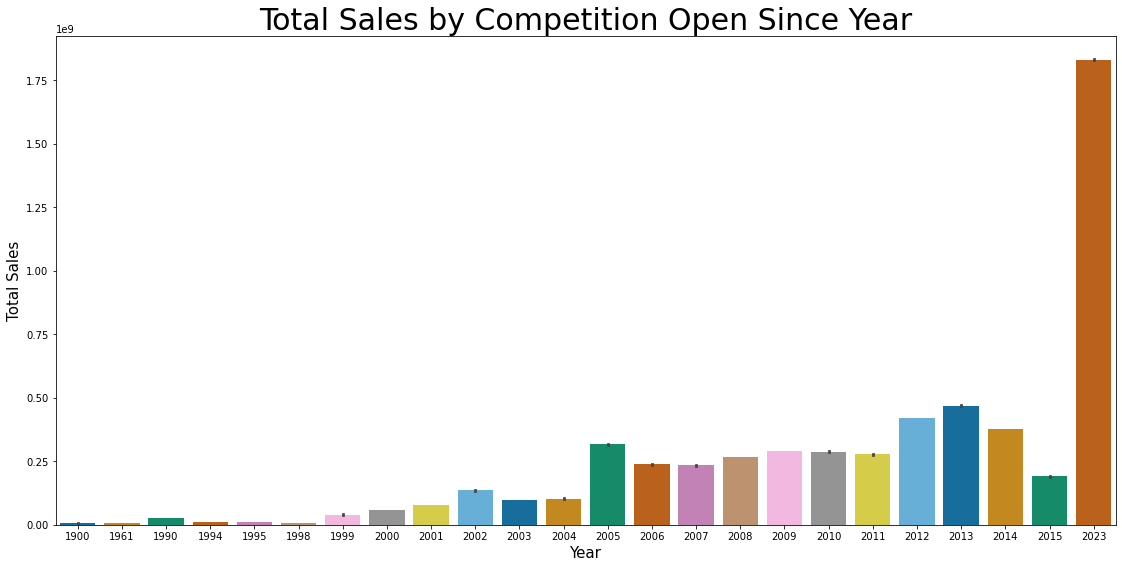

In [71]:
plt.rcParams['figure.figsize'] = (19, 9)
sns.barplot(x=df_new['CompetitionOpenSinceYear'], y=df_new['Sales'], palette = 'colorblind',estimator=sum)
plt.title('Total Sales by Competition Open Since Year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total Sales', fontsize = 15)
plt.show()

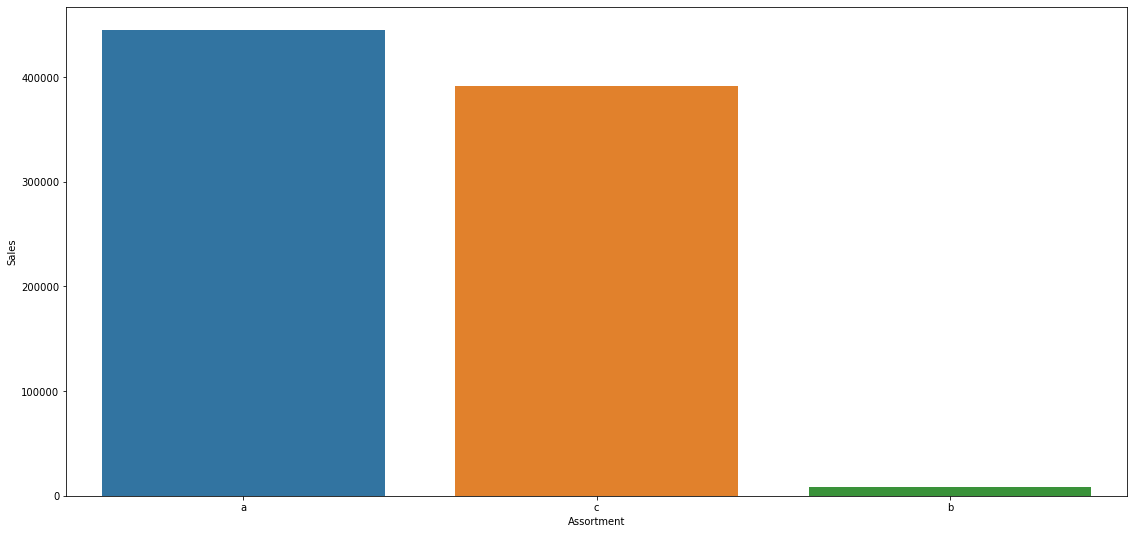

In [72]:
from numpy import count_nonzero

#Count of Sales by Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new, estimator=count_nonzero)

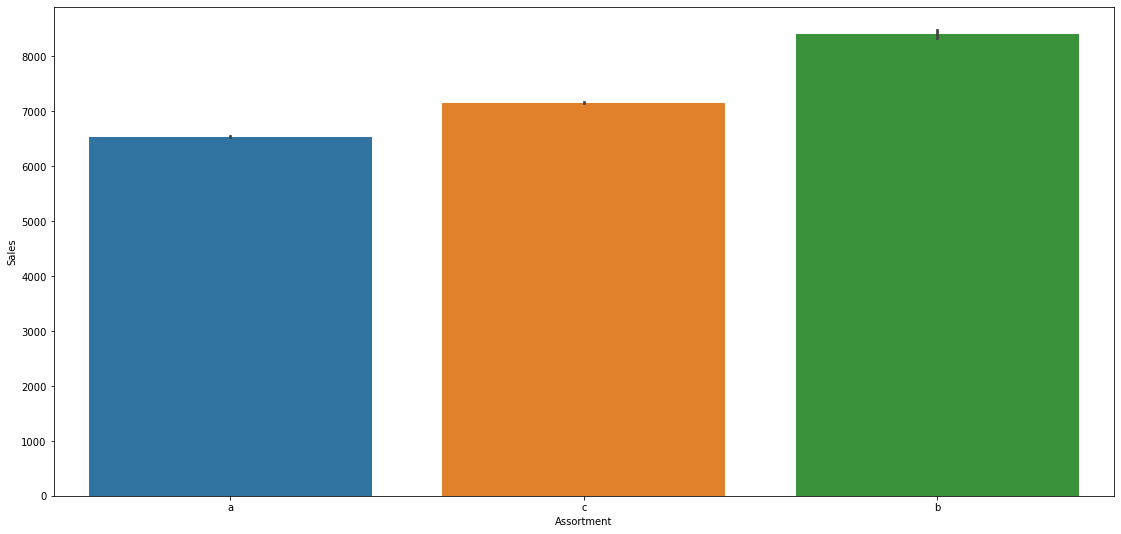

In [73]:
#Average Sales by Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new)

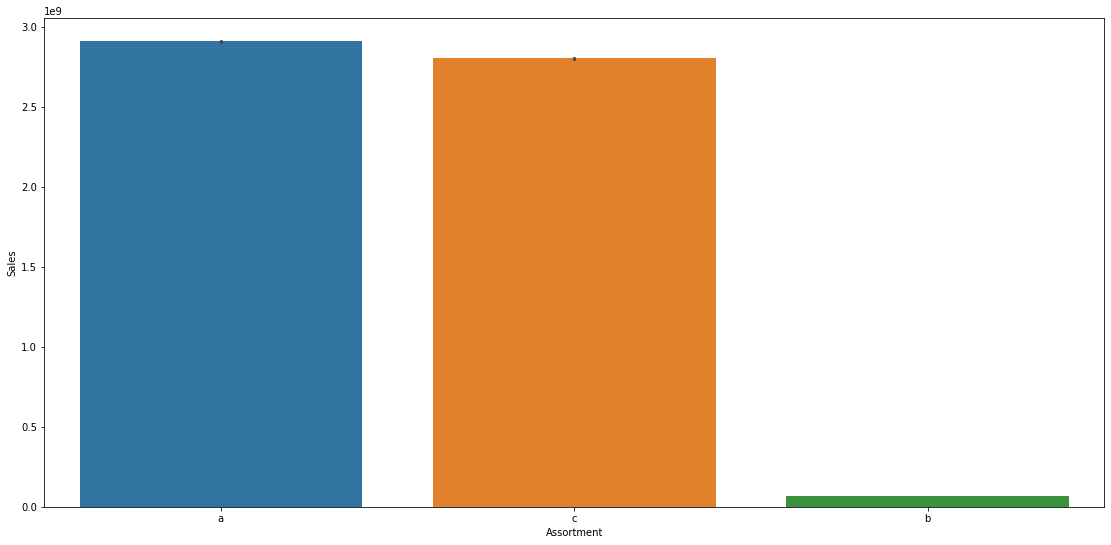

In [74]:
# Sum Sales by Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new, estimator=sum)

# CONVERTING DATA INTO MONTHLY

In [75]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,2008,0,1,2023,NA,7,3,2015,31,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,...,2008,0,1,2023,NA,7,3,2015,30,31
2,1,3,2015-07-29,4782,523,1,0,1,c,a,...,2008,0,1,2023,NA,7,3,2015,29,31
3,1,2,2015-07-28,5011,560,1,0,1,c,a,...,2008,0,1,2023,NA,7,3,2015,28,31
4,1,1,2015-07-27,6102,612,1,0,1,c,a,...,2008,0,1,2023,NA,7,3,2015,27,31


In [76]:
# converting the data into monthly sales data

# making a dataset with only monthly sales data
data = df_new.groupby([df_new['Date'].apply(lambda x: x.strftime('%Y-%m')),'Store']).sum().reset_index()

data.head()

,Date,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Quarter,Year,Day,Week
0,2013-01,1,91,128431,15899,10,9,33020.0,234,52208,0,26,52598,26,26,52338,429,78
1,2013-01,2,91,115171,14127,10,3,14820.0,286,52182,26,338,52260,26,26,52338,429,78
2,2013-01,3,91,165653,18291,10,3,367380.0,312,52156,26,364,52286,26,26,52338,429,78
3,2013-01,4,91,234713,33390,10,3,16120.0,234,52234,0,26,52598,26,26,52338,429,78
4,2013-01,5,91,109442,13213,10,1,777660.0,104,52390,0,26,52598,26,26,52338,429,78


In [77]:
# converting the data into monthly sales data - part 2

# specifying the important attributes which we want to add to the data
data = data[['Date','Store','Sales']]
             
data.head()

,Date,Store,Sales
0,2013-01,1,128431
1,2013-01,2,115171
2,2013-01,3,165653
3,2013-01,4,234713
4,2013-01,5,109442


In [78]:
# converting the data into monthly sales data - part 3

# at last we can select the specific attributes from the dataset which are important 
data = data.pivot_table(index=['Store'], columns = 'Date', values = 'Sales', fill_value = 0).reset_index()

data.head()

Date,Store,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07
0,1,128431,125271,145169,118009,118225,113411,128032,118320,108867,...,114897,130852,161026,119602,106635,118917,110655,105220,110011,121266
1,2,115171,111114,130525,116878,116379,115871,138778,125163,119081,...,121397,132657,154420,127498,114078,134574,121012,115535,132800,133765
2,3,165653,160167,189179,172188,170374,170462,206426,178302,163290,...,162365,178244,211560,167795,153537,176835,171183,164244,189918,183535
3,4,234713,230148,251159,225723,235284,235227,228096,238263,219550,...,245877,260744,287870,246786,228867,248745,240370,232948,248528,276552
4,5,109442,101126,116860,106141,110292,105280,151892,125969,110338,...,113204,123304,148855,119043,105065,121681,113909,108196,124041,124190


# PREDICT FUTURE SALES

In [79]:
# now let's create the actual training data

x_train = data.drop(['2015-07'], axis = 1)
y_train = data['2015-07']

# deleting the first column so that it can predict the future sales data
x_test = data.drop(['2013-01'], axis = 1)

# checking the shapes of the datasets
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)

Shape of x_train : (1115, 31)
Shape of x_test : (1115, 31)
Shape of y_train : (1115,)


In [80]:
# let's check the x_train dataset
# table 2015-07 already deleted

x_train.head()

Date,Store,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06
0,1,128431,125271,145169,118009,118225,113411,128032,118320,108867,...,106398,114897,130852,161026,119602,106635,118917,110655,105220,110011
1,2,115171,111114,130525,116878,116379,115871,138778,125163,119081,...,128828,121397,132657,154420,127498,114078,134574,121012,115535,132800
2,3,165653,160167,189179,172188,170374,170462,206426,178302,163290,...,173615,162365,178244,211560,167795,153537,176835,171183,164244,189918
3,4,234713,230148,251159,225723,235284,235227,228096,238263,219550,...,242580,245877,260744,287870,246786,228867,248745,240370,232948,248528
4,5,109442,101126,116860,106141,110292,105280,151892,125969,110338,...,118728,113204,123304,148855,119043,105065,121681,113909,108196,124041


In [81]:
# let's check the x_test data
# table 2013-01 already deleted

x_test.head()

Date,Store,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07
0,1,125271,145169,118009,118225,113411,128032,118320,108867,114641,...,114897,130852,161026,119602,106635,118917,110655,105220,110011,121266
1,2,111114,130525,116878,116379,115871,138778,125163,119081,120362,...,121397,132657,154420,127498,114078,134574,121012,115535,132800,133765
2,3,160167,189179,172188,170374,170462,206426,178302,163290,168277,...,162365,178244,211560,167795,153537,176835,171183,164244,189918,183535
3,4,230148,251159,225723,235284,235227,228096,238263,219550,224903,...,245877,260744,287870,246786,228867,248745,240370,232948,248528,276552
4,5,101126,116860,106141,110292,105280,151892,125969,110338,115805,...,113204,123304,148855,119043,105065,121681,113909,108196,124041,124190


In [82]:
# let's check the y_train data
# table 2015-07 

y_train

0       121266
1       133765
2       183535
3       276552
4       124190
         ...  
1110    121762
1111    225636
1112    181111
1113    367524
1114    189587
Name: 2015-07, Length: 1115, dtype: int64

In [83]:
# splitting the data into train and valid dataset
# test_size= 0,2 = training 80% and testing 20%

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

# checking the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_valid :", x_valid.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_valid :", y_valid.shape)

Shape of x_train : (892, 31)
Shape of x_valid : (223, 31)
Shape of y_train : (892,)
Shape of y_valid : (223,)


In [84]:
pip install lightgbm

In [85]:
from lightgbm import LGBMRegressor

model_lgb = LGBMRegressor( n_estimators=200,
                           learning_rate=0.03,
                           num_leaves=32,
                           colsample_bytree=0.9497036,
                           subsample=0.8715623,
                           max_depth=8,
                           reg_alpha=0.04,
                           reg_lambda=0.073,
                           min_split_gain=0.0222415,
                           min_child_weight=40)
model_lgb.fit(x_train, y_train)

y_pred_lgb = model_lgb.predict(x_test)

In [86]:
print(y_pred_lgb)

[121345.69590134 138656.79676449 201254.1451182  ... 178127.96309396
 350095.34547193 197742.4736603 ]


In [87]:
# Get the test set predictions and clip values to the specified range
y_pred_lgb = model_lgb.predict(x_test)

# Create the submission file and submit
preds = pd.DataFrame(y_pred_lgb, columns=['Sales'])
preds.to_csv('submission.csv',index_label='Store')

In [88]:
preds

,Sales
0,121345.695901
1,138656.796764
2,201254.145118
3,264676.540891
4,131528.168523
...,...
1110,136871.885640
1111,230889.450915
1112,178127.963094
1113,350095.345472
